In [3]:
# load necessary libraries

import warnings
warnings.simplefilter("ignore")

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot

filename = 'international-airline-passengers.csv'

In [4]:
# ---------------------------------
# set plot attributes
# ---------------------------------
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 10, 7

In [5]:
# ---------------------------------
# Load Dataset
# ---------------------------------
dataset = pd.read_csv(filename, 
                      header=0, parse_dates=[0],
                      index_col=0, squeeze=True)
# print dataset
print()
print(dataset.shape)
print(dataset.head(25))


(144,)
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
Name: Passenger, dtype: int64


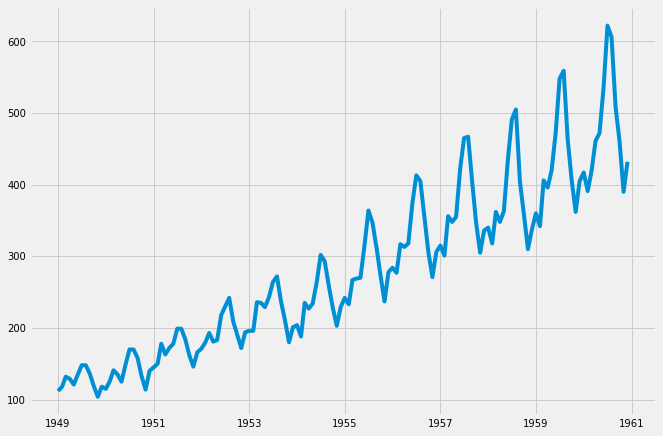

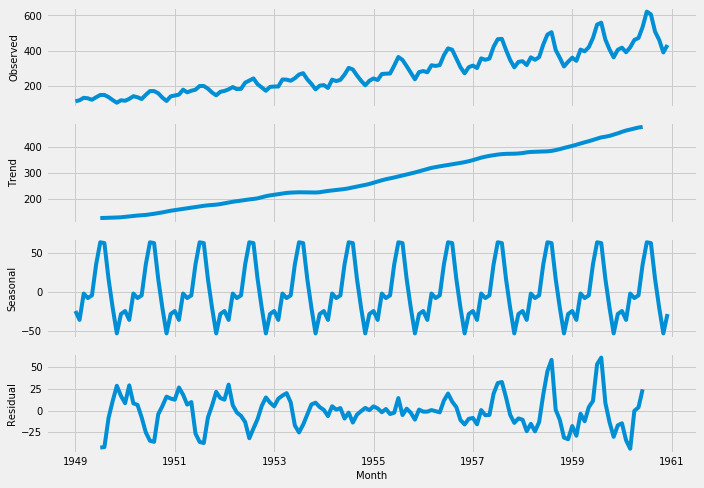

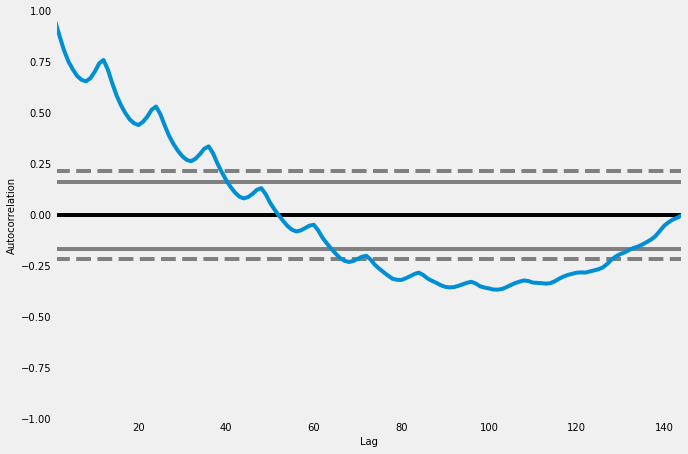

In [6]:
# ---------------------------------
# Visualise Time Series Dataset
# ---------------------------------
# Plot Dataset
plt.plot(dataset)
plt.show()

print('\n\n\n')

# Decompose diffentent Time Series elements e.g. trand, seasonality, Residual ... ...
decomposition = sm.tsa.seasonal_decompose(dataset, model='additive')
decomposition.plot()
plt.show()

print('\n\n\n')

# Auto-correlation plot
autocorrelation_plot(dataset)
plt.show()

In [7]:
# -------------------------------------------------
# ARIMA(1,0,0) Model 
# -------------------------------------------------
warnings.simplefilter("ignore")

model = ARIMA(dataset, order=(1, 0, 0))
results = model.fit()

                              ARMA Model Results                              
Dep. Variable:              Passenger   No. Observations:                  144
Model:                     ARMA(1, 0)   Log Likelihood                -711.090
Method:                       css-mle   S.D. of innovations             33.446
Date:                Thu, 27 Dec 2018   AIC                           1428.179
Time:                        08:19:28   BIC                           1437.089
Sample:                    01-01-1949   HQIC                          1431.800
                         - 12-01-1960                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             278.0689     67.024      4.149      0.000     146.704     409.434
ar.L1.Passenger     0.9646      0.021     45.139      0.000       0.923       1.006
                                

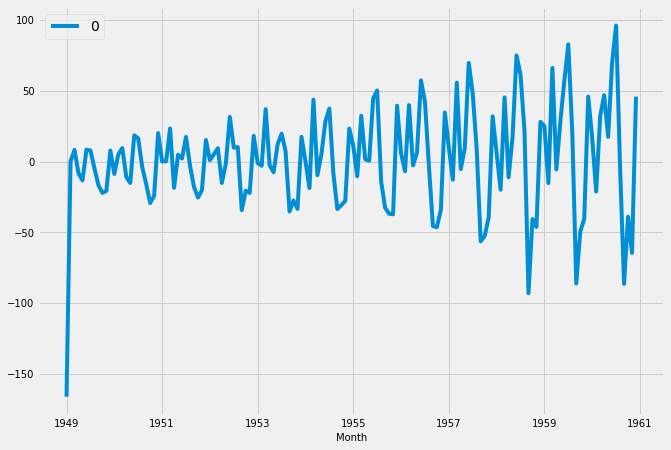

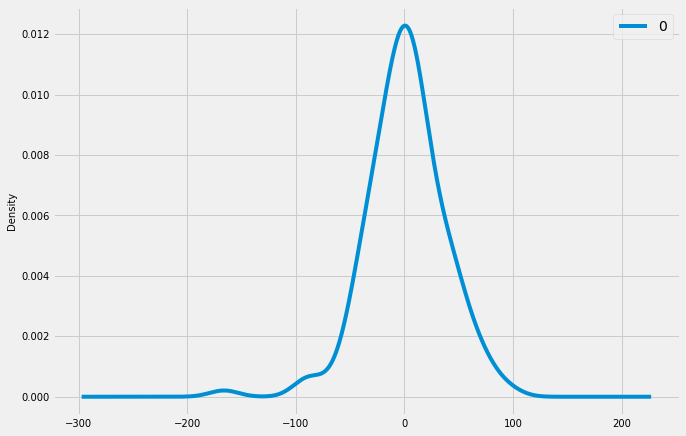

                0
count  144.000000
mean     1.110088
std     36.119939
min   -166.068867
25%    -18.919498
50%      0.482281
75%     20.281391
max     96.102163


In [8]:
# -------------------------------------------------
# Fit ARIMA(p,d,q) Model with the best parameter sets
# -------------------------------------------------
# Get summary of the model
print(results.summary())
print(results.summary().tables[1])
print(results.summary().tables[2])

# plot residual errors
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
    
residuals.plot(kind='kde')
plt.show()
    
print(residuals.describe())

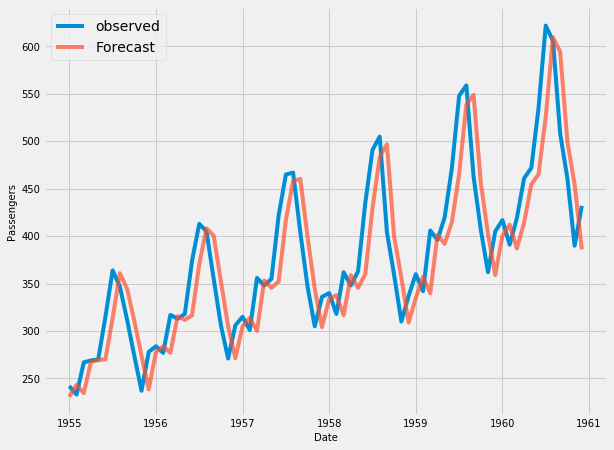

In [9]:
# ------------------------------------------------
# Validating forecasts from the fitted model
# ------------------------------------------------
pred    = results.predict(start=pd.to_datetime('1955-01'), dynamic=False)
actual  = dataset['1955-01':].plot(label='observed')
    
pred.plot(ax=actual, label='Forecast', alpha=.7, figsize=(9, 7))

actual.set_xlabel('Date')
actual.set_ylabel('Passengers')
plt.legend()
plt.show()

In [10]:
# -------------------------------------------------------
# Evaluating the model using different KPIs or metrics
# -------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
y_forecasted    = results.predict(start=pd.to_datetime('1955-01'), dynamic=False)
y_truth         = dataset['1955-01':]

coefficient_of_dermination = r2_score(y_truth, y_forecasted)
print("R squared: ", coefficient_of_dermination)

mae = mean_absolute_error(y_truth, y_forecasted)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))

mse = mean_squared_error(y_truth, y_forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

#msle = mean_squared_log_error(y_truth, y_forecasted)
#print('The Mean Squared Log Error of our forecasts is {}'.format(round(msle, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

R squared:  0.7476273184565231
The Mean Absolute Error of our forecasts is 35.61
The Mean Squared Error of our forecasts is 1859.47
The Root Mean Squared Error of our forecasts is 43.12


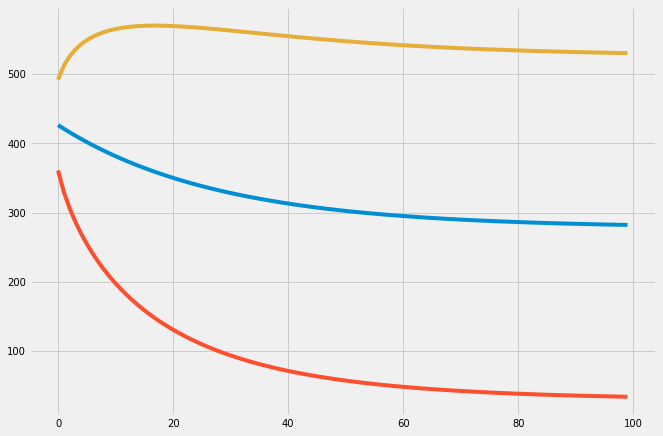


Forecasted Values: 
[426.54676355 421.28671601 416.21301338 411.31905412 406.59847055
 402.04512059 397.65307973 393.41663338 389.33026935 385.38867077
 381.58670912 377.91943753 374.38208443 370.97004725 367.67888651
 364.50431996 361.4422171  358.48859373 355.6396068  352.89154942
 350.24084601 347.68404766 345.21782765 342.8389771  340.54440082
 338.33111328 336.1962347  334.13698733 332.15069183 330.23476375
 328.38671025 326.60412675 324.88469389 323.22617446 321.62641053
 320.08332057 318.59489685 317.15920272 315.77437017 314.43859734
 313.15014622 311.90734038 310.70856276 309.5522536  308.43690839
 307.36107592 306.3233564  305.32239961 304.35690319 303.42561089
 302.527311   301.66083469 300.82505459 300.01888322 299.24127165
 298.49120812 297.76771668 297.069856   296.39671805 295.74742701
 295.12113805 294.5170363  293.93433574 293.37227821 292.83013238
 292.30719287 291.80277926 291.31623525 290.84692777 290.39424619
 289.95760153 289.53642564 289.13017053 288.7383076  28

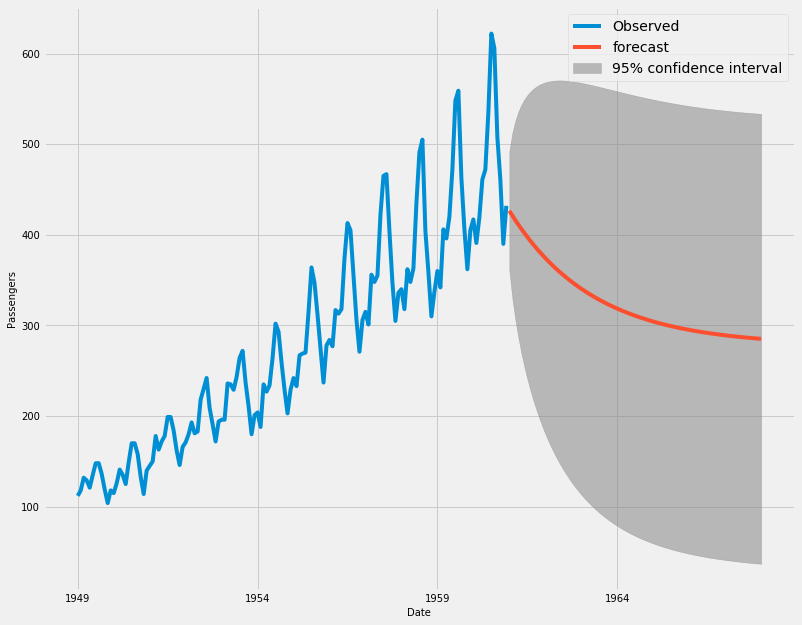

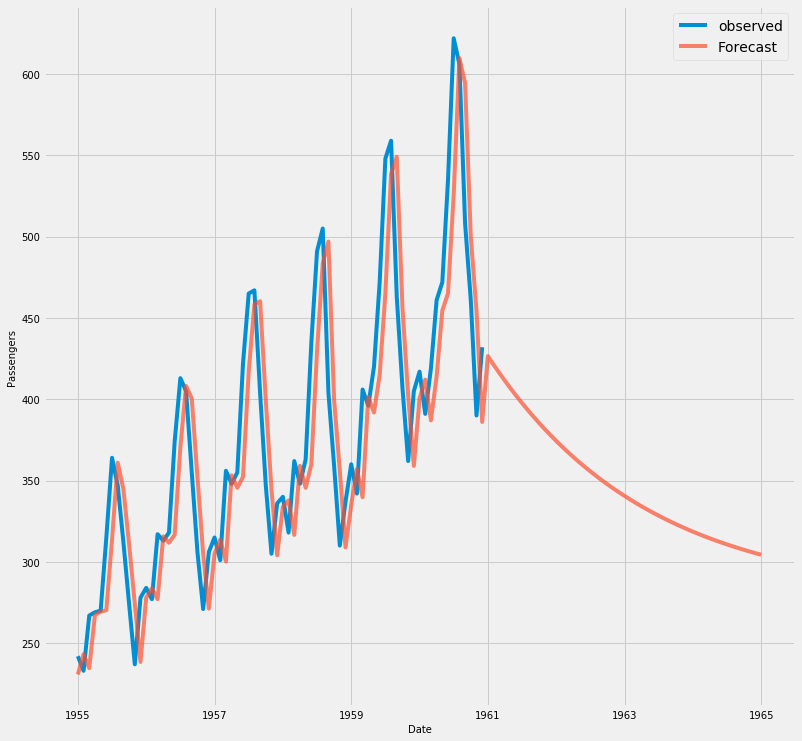

In [15]:
# -----------------------------------------------
# Forecasts (Prediction) and Visualisation
# -----------------------------------------------
pred_uc = results.forecast(steps=100)
plt.plot(pred_uc[0])
plt.plot(pred_uc[2])
plt.show()
    
print()
print("Forecasted Values: ")
print(pred_uc[0])
print()
    
# Visualise forecasts
ax = dataset.plot(label='Observed', figsize=(12, 10))
results.plot_predict('1961', '1968', dynamic=True, ax=ax,  plot_insample=False)    
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

# ----------------------------
# More Plots on Forecast
# ----------------------------
print('\n\n\n')
pred    = results.predict(start=pd.to_datetime('1955-01'), 
                              end=pd.to_datetime('1965-01'),
                              dynamic=False)
actual  = dataset['1955-01':].plot(label='observed')
    
pred.plot(ax=actual, label='Forecast', alpha=.7, figsize=(12, 12))

actual.set_xlabel('Date')
actual.set_ylabel('Passengers')
plt.legend()
plt.show()